# Exploring some data from the Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.modules.lfw_lightning_data_module import LfwImagesDataset, LFW_DataModule
from src.tools.dataset_tools import get_dataset_filename_map, dataset_download_targz

dataset_download_targz()
image_map = get_dataset_filename_map()
dataset = LfwImagesDataset(image_map)
print("Number of pictures", len(dataset))

Dataset already downloaded
Number of pictures 9164


In [3]:
#some of element in image map

c = 0
for key in image_map:
    print(key)
    print(image_map[key],"\n")
    c += 1
    if c==5:
        break

Paul_McNulty
['./data/dataset/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0002.jpg', './data/dataset/lfw-deepfunneled/Paul_McNulty/Paul_McNulty_0001.jpg'] 

Claudia_Pechstein
['./data/dataset/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0001.jpg', './data/dataset/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0003.jpg', './data/dataset/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0002.jpg', './data/dataset/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0005.jpg', './data/dataset/lfw-deepfunneled/Claudia_Pechstein/Claudia_Pechstein_0004.jpg'] 

Ranil_Wickremasinghe
['./data/dataset/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0002.jpg', './data/dataset/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0003.jpg', './data/dataset/lfw-deepfunneled/Ranil_Wickremasinghe/Ranil_Wickremasinghe_0001.jpg'] 

Mary-Kate_Olsen
['./data/dataset/lfw-deepfunneled/Mary-Kate_Olsen/Mary-Kate_Olsen_0002.jpg', './data/dataset/lfw-deepfunneled/Mary-Kate_Olsen

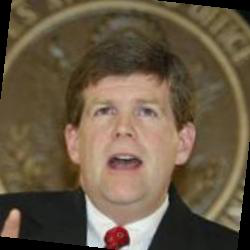

image1


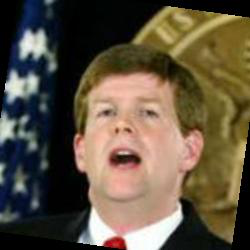

image2
They are the same person?  True

 
 



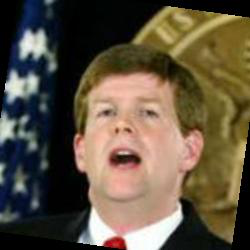

image1


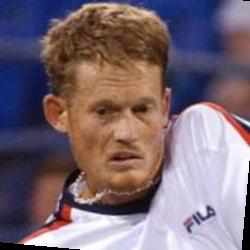

image2
They are the same person?  False

 
 



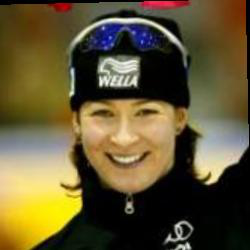

image1


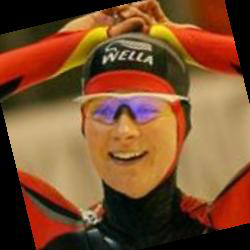

image2
They are the same person?  True

 
 



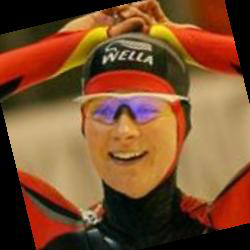

image1


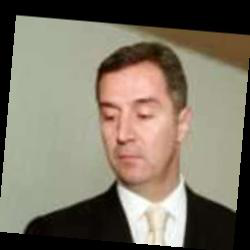

image2
They are the same person?  False

 
 



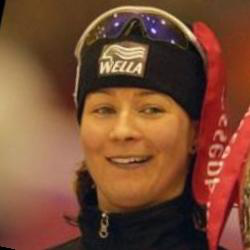

image1


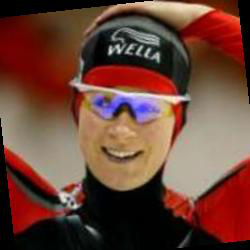

image2
They are the same person?  True

 
 



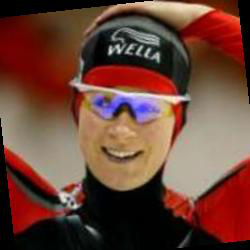

image1


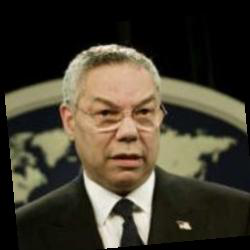

image2
They are the same person?  False

 
 



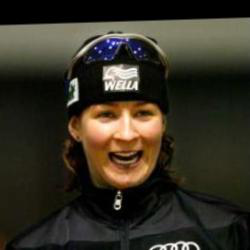

image1


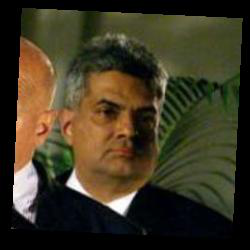

image2
They are the same person?  False

 
 



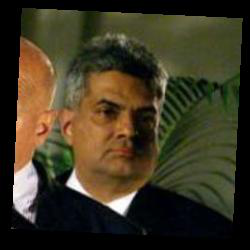

image1


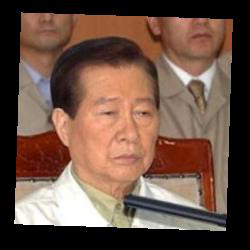

image2
They are the same person?  False

 
 



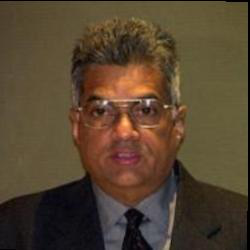

image1


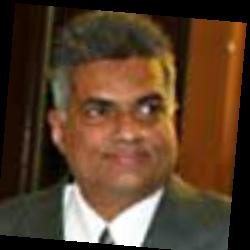

image2
They are the same person?  True

 
 



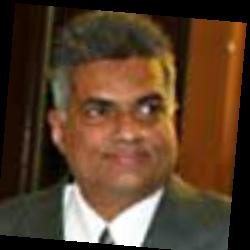

image1


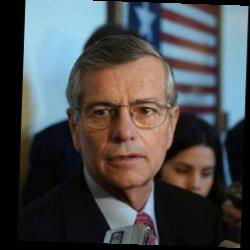

image2
They are the same person?  False


In [4]:
#some images

from PIL import Image
import numpy as np

c=0
for image1,image2,label in dataset:
    print("\n \n \n")
    display(image1)
    print("image1")
    display(image2)
    print("image2")
    print("They are the same person? ",label)
    c+=1
    if c==10:
        break


In [5]:
#some statistics
print("Number of subjects: ",len(image_map))
pic=0
for val in image_map.values():
    pic += len(val)
print("Total number of pictures: ",pic)
print("Avg pic for each subject: ", pic/len(image_map))

Number of subjects:  1680
Total number of pictures:  9164
Avg pic for each subject:  5.454761904761905


In [6]:
#DataLoader info
import multiprocessing as mp

dataloader = LFW_DataModule(dataset, batch_size=32, splitting_points=(0.11, 0.11), num_workers=mp.cpu_count())
dataloader.setup()
train_loader = dataloader.train_dataloader()
val_loader = dataloader.val_dataloader()
test_loader = dataloader.test_dataloader()

print("Batch_size: ", train_loader.batch_size)
print("Sampler info: ", train_loader.sampler)
print("Train loader length: ",len(train_loader))
print("Validation loader length: ",len(val_loader))
print("Test loader length: ",len(test_loader))

[7148, 1008, 1008]
Batch_size:  32
Sampler info:  <torch.utils.data.sampler.RandomSampler object at 0x7fbd5f935d30>
Train loader length:  224
Validation loader length:  32
Test loader length:  32


max value 1.0
min value 0.0
tensor([False,  True, False,  True, False])


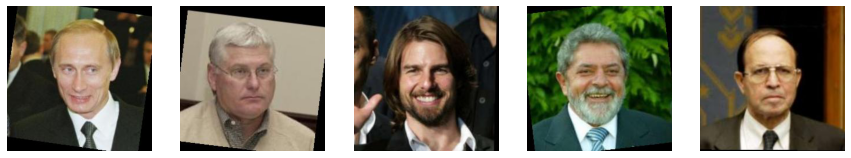

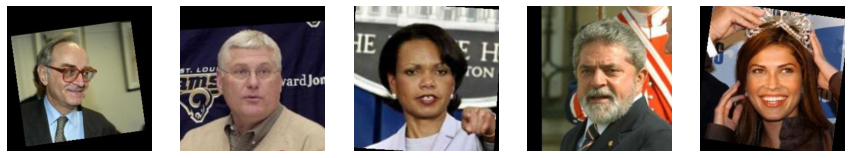

In [7]:
#Dataloader samples
from src.tools.visualization_tools import visualize_torch
import torch

for i, (im1, im2, label) in enumerate(train_loader):
    print('max value', torch.max(im1).item())
    print('min value', torch.min(im1).item())
    visualize_torch(im1[0:5])
    visualize_torch(im2[0:5])
    print(label[0:5])
    
    if i == 0:
        break

# Training the model